<a href="https://colab.research.google.com/github/khanh22mse23057/fsb-datamining/blob/main/%5BKhanhPNP%5D%5B22mse23057%5DLab_1a_Linear_Models_for_Regression_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Linear models

## Part 1: Regression

In [ ]:
from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
import os
import sys
# os.chdir('/content/gdrive/My Drive/Teaching-task/myDM-MLcourse/ml-course/notebooks')
# sys.path.append("/content/gdrive/My Drive/Teaching-task/myDM-MLcourse/ml-course/notebooks")
# !pwd

In [ ]:
!pip install openml

The [NO2 dataset](https://www.openml.org/d/547) contains 500 measurement of pollution caused by cars. The goal is to predict the concentration of $NO_2$ from data about traffic and atmospheric conditions. The predictive variables include the number of cars per hour, temperature, wind, and time of day.

In [ ]:
# Auto-setup when running on Google Colab
if 'google.colab' in str(get_ipython()):
    !pip install openml

# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm
import sys
import os

# Hide convergence warning for now
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Hiding all warnings. Not recommended, just for compilation.
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

In [ ]:
# Download NO2 data. Takes a while the first time.
no2 = oml.datasets.get_dataset(547)
X, y, _, _ = no2.get_data(target=no2.default_target_attribute);
attribute_names = list(X)


/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


## Quick visualization
We can use pandas to quickly visualize the data. If you are new to pandas, take some time to understand the code.

We'll remove the 'day' feature to focus on the non-temporal aspects of this interaction. We are not aiming to predict future levels, and even if we would it would require special treatment (e.g. different train-test splits). There also doesn't seem to be a long term trend in the data, even though there are clear periodic trends in temperature.

<ipython-input-6-e2c01c6a11b6>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  df.plot(use_index=False,figsize=(20,5),cmap=cm.get_cmap('brg'));


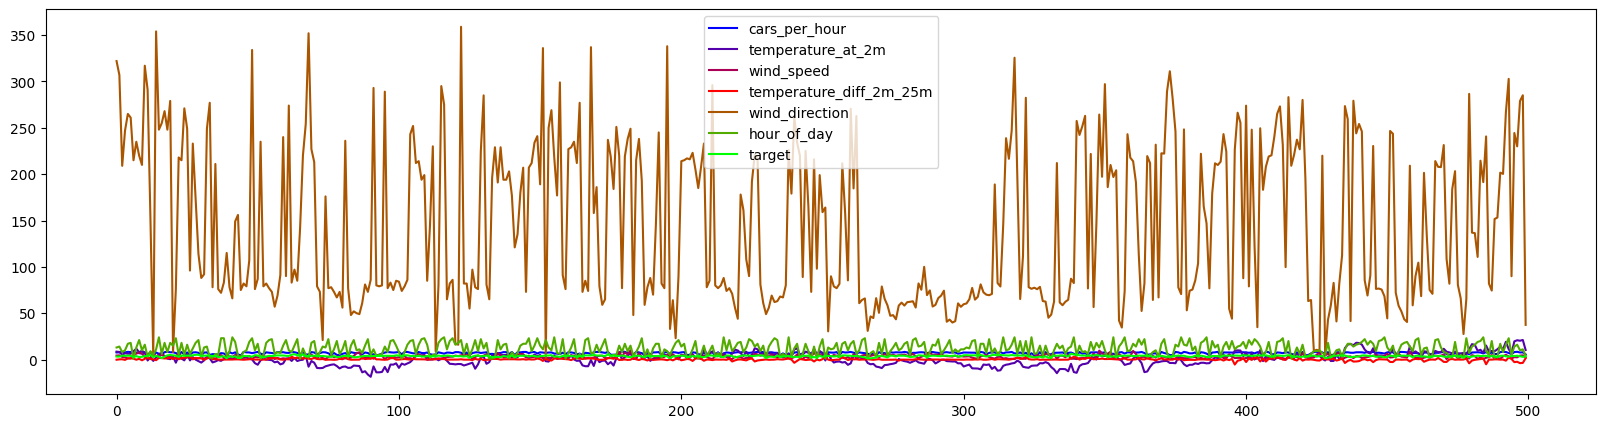

In [ ]:
df = pd.DataFrame(X, columns=attribute_names).join(pd.DataFrame(list(y),columns=['target']))
df = df.sort_values(['day','hour_of_day']).drop('day',axis=1)
df.plot(use_index=False,figsize=(20,5),cmap=cm.get_cmap('brg'));
X = X.drop('day',axis=1)

In [ ]:
df.head(5)

,cars_per_hour,temperature_at_2m,wind_speed,temperature_diff_2m_25m,wind_direction,hour_of_day,target
42,7.64300,8.5,4.3,-0.2,322.0,13,3.22287
20,7.75061,8.2,4.5,0.2,307.0,14,3.15274
255,8.12415,5.2,2.8,0.3,209.0,8,4.19570
488,7.64108,6.7,2.3,-0.4,247.0,10,3.98155
94,8.31630,6.3,1.2,1.3,265.0,17,4.14155


If we plot the data, ordered by time of measurement, we can see that the wind direction (measured in angular degrees) is scaled very differently from the other features. Let's now zoom in to the other measures:

<ipython-input-8-ba153169720d>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  df.drop('wind_direction',axis=1).plot(use_index=False,figsize=(20,5),cmap=cm.get_cmap('brg'));


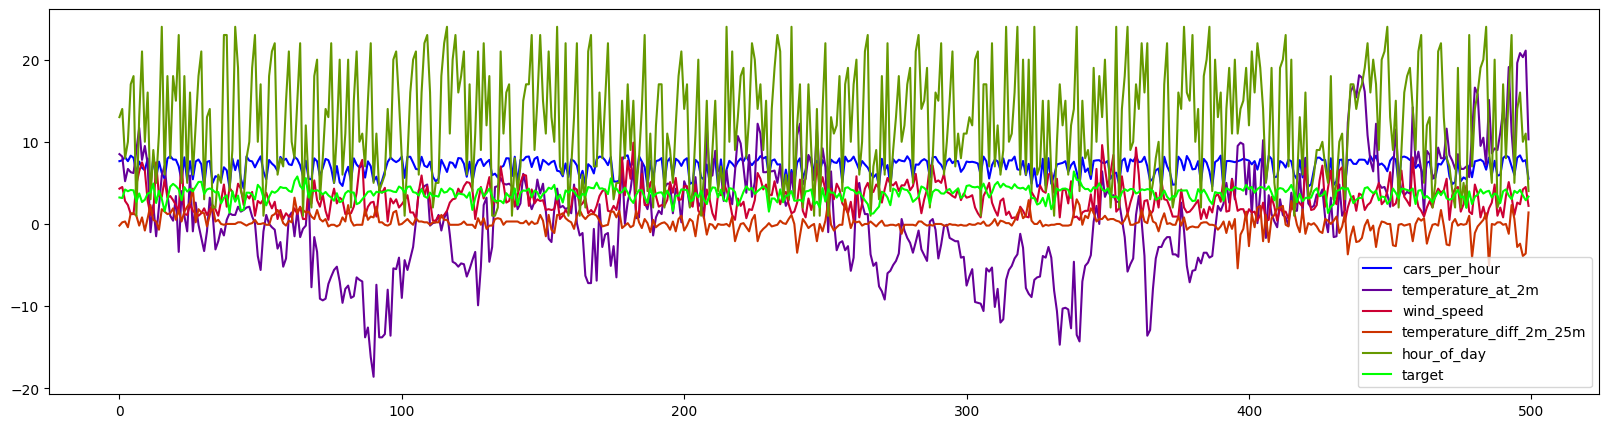

In [ ]:
df.drop('wind_direction',axis=1).plot(use_index=False,figsize=(20,5),cmap=cm.get_cmap('brg'));

We can see that the target ($NO_2$ levels) seem to be correlated to the number of cars per hour, which makes sense because cars produce $NO_2$. Other influences (air temperature differences and wind) seem to have a more complex and subtle effect. Let's try to model these using linear regression models.

## Exercise 1: Model benchmark
It is clear that $NO_2$ concentrations depend on a combination of these features, so we will now try to learn this complex relationship. We first evaluate a range of linear regression problems, i.e. Linear Regression, Ridge, Lasso and ElasticNet, as well as kNN. Since we observed that somf features have very different scales, we'll also build pipelines of all these measures with an additional scaling step. For now, we'll stick to the default hyperparameter settings.

### Exercise 1.1
Implement a function below which evaluates each classifier passed into it on the given data, and then returns both the train and test scores of each as a list. You are allowed to import additional functions from whichever module you like, but you should be able to complete the function with [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) function and standard Python built-ins. Below you the function you will find example output.

In [ ]:
def evaluate_learners(models, X, y):
    """
    Given a list of models [model1, model2, ..., modelN] return two lists:
     - a list with the scores obtained on the training samples for each model,
     - a list with the test scores obtained on the test samples for each model.
     The order of scores should match the order in which the models were originally provided. E.g.:
     [Model1 train score, ..., ModelN train score], [Model1 test score, ..., ModelN test score]
    """
    pass

# # Example output:
# train_scores, test_scores = ([[0.92 , 0.924, 0.916, 0.917, 0.921],  # Model 1 train score for each of 5 folds.
#                               [0.963, 0.962, 0.953, 0.912, 0.934],  # Model 2 train score for each of 5 folds.
#                               ..
#                              [[0.801, 0.811, 0.806, 0.826, 0.804],  # Model 1 test score for each of 5 folds.
#                               [0.766, 0.756, 0.773, 0.756, 0.741],  # Model 2 test score for each of 5 folds.
#                               ..

#### Solution

In [ ]:
# MODEL IMPLEMENTATION:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def evaluate_learners(models, X, y):
    """ Evaluate each model in 'models' with cross-validation on the provided (X, y) data.

    Given a list of models [model1, model2, ..., modelN] return two lists:
     - a list with the scores obtained on the training samples for each model,
     - a list with the test scores obtained on the test samples for each model.
     The order of scores should match the order in which the models were originally provided. E.g.:
     [Model1 train score, ..., ModelN train score], [Model1 test score, ..., ModelN test score]
    """
    # Evaluate with 5-fold cross-validation.
    train_scores = []
    test_scores = []

    for model in models:
        # Perform cross-validation to get train and test scores
        cv_results = cross_validate(model, X, y, cv=5, return_train_score=True)

        # Calculate mean train and test scores across cross-validation folds
        train_score = cv_results['train_score'].mean()
        test_score = cv_results['test_score'].mean()

        train_scores.append(train_score)
        test_scores.append(test_score)

    return train_scores, test_scores

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Create a list of models to evaluate
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    KNeighborsRegressor()
]

In [ ]:
# Optionally, you can add a standard scaler to your models if needed
scaler = StandardScaler()

### Exercise 1.2
Call the function you created with a Linear Regression, Ridge, Lasso and ElasticNet, as well as kNN.
Store the return values in the variables `train_scores` and `test_scores`. Then, run the code given below to produce a plot visualizing the scores.

In [ ]:
# Dummy code. Replace with the actual classifiers and scores
classifiers = [LinearRegression()]
train_scores, test_scores = [[0.6,0.7,0.8]], [[0.7,0.8,0.9]]

#### Solution

In [ ]:
# models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), KNeighborsRegressor()]
# Assuming you have your data X and target y
# If you need scaling, apply it to X before calling the function

train_scores, test_scores = evaluate_learners(models, X, y)
# Now you have the train_scores and test_scores for each model
print("Train Scores:", train_scores)
print("Test Scores:", test_scores)

Train Scores: [0.5092189113021739, 0.5092139274440718, 0.036179449237003024, 0.10252453512938772, 0.43805315420881674]
Test Scores: [0.48009729520109046, 0.48013168144110896, 0.011521555589713151, 0.07415688849674511, 0.10037915156910611]


In [ ]:
# Create a list of model names for labeling the plot
model_names = ["Linear Regression", "Ridge", "Lasso", "ElasticNet", "kNN"]

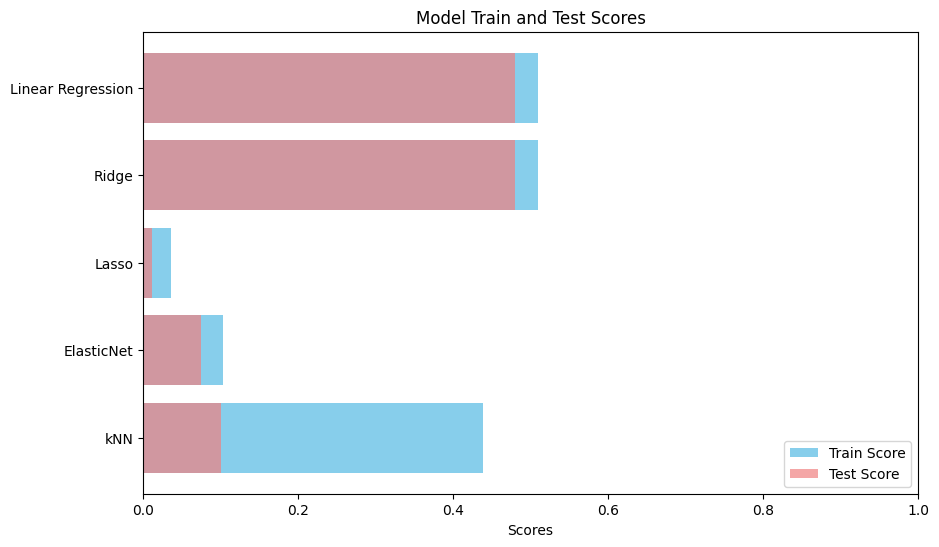

In [ ]:
# Plot the train and test scores
plt.figure(figsize=(10, 6))
plt.barh(model_names, train_scores, color='skyblue', label='Train Score')
plt.barh(model_names, test_scores, color='lightcoral', label='Test Score', alpha=0.7)
plt.xlabel('Scores')
plt.title('Model Train and Test Scores')
plt.legend(loc='lower right')
plt.xlim(0, 1)  # Adjust the x-axis limits if needed
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score at the top
plt.show()

### Exercise 1.3
Interpret the plot. Which is the best regressor? Are any of the models overfitting? If so, what can we do to solve this? Is there a lot of variance in the results?

Interpreting the plot of model train and test scores can provide valuable insights into the performance of different regressors. Let's analyze the plot and address the questions:

**Which is the best regressor?:**

In the plot, the best regressor is the one with the highest test score (R-squared or a similar evaluation metric). From the plot, you can see which model has the highest test score. The model with the highest test score is considered the best regressor for this particular dataset and problem. Keep in mind that the choice of the "best" model can vary depending on the specific dataset and problem you are working with.

**Are any of the models overfitting?:**

Overfitting occurs when a model performs exceptionally well on the training data but poorly on the test data, indicating that it has learned the noise in the training data rather than the underlying patterns. In the plot, you can look for cases where the train score is significantly higher than the test score. If you see a model with a large gap between train and test scores, it might be overfitting.

**If overfitting is observed, what can we do to solve this?:**

To address overfitting, you can consider the following strategies:

Regularization: Models like Ridge, Lasso, and ElasticNet have regularization parameters that can help mitigate overfitting by penalizing large coefficients.
Feature Selection: Removing irrelevant or redundant features can simplify the model and reduce overfitting.
More Data: Increasing the size of the training dataset can help the model generalize better.
Cross-validation: Use cross-validation techniques (e.g., k-fold cross-validation) to get a better estimate of a model's performance and detect overfitting.
**Is there a lot of variance in the results?:**

Variance in the results can be observed by looking at how the test scores vary across different models. If you see significant fluctuations in the test scores for different models, it indicates that there is variance in the model performance. This could be due to the sensitivity of the models to the training data or random factors.

To make more specific observations about your dataset and models, you should examine the actual plot of scores. The regressor with the highest test score is a good choice, but also consider factors like computational complexity, interpretability, and the specific requirements of your problem. If overfitting is an issue, you may want to fine-tune hyperparameters or explore more complex techniques like cross-validation with hyperparameter search to find a better model configuration. Finally, if there is a lot of variance in the results, it's important to understand the underlying reasons and potentially gather more data or use ensemble techniques to stabilize model performance.

#### Solution

Linear regression and ridge regression don't surpass 0.5 $R^2$, yet don't seem to drastically overfit. kNN is drastically overfitting. Lasso and ElasticNet are catastrophically bad in their default settings.

## Exercise 2: Regularization
We will now tune these algorithm's main regularization hyperparameter: the regularization hyperparameter (`alpha`) in Lasso and Ridge, and the number of neighbors (`n_neighbors`) in kNN.

We expect the optimum for the alpha parameters to lie in $[10^{-12},10^{12}]$ and for n_neighbors between 1 and 50. alpha should be varied on a log scale (i.e. [0.01, 0.1, 1, 10, 100]), k should be varied uniformly (i.e. [1,2,3,4]).

### Exercise 2.1
Vary the hyperparameters in the range given above and, for each regressor, create a line plot that plots both the training and test score for every value of the regularization hyperparameter. Hence, you should produce 3 plots, one for each regressor. Use the default 5-fold cross validation for all scores, but only plot the means.

Hints:
* Think about the time complexity of these models. Trying too many hyperparameter values may take too much time.
* You can make use of numpy's [logspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html), [geomspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.geomspace.html?highlight=geomspace#numpy.geomspace), and [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace) functions.
* You can use matplotlib's default [plot](https://matplotlib.org/tutorials/introductory/pyplot.html) function to plot the train and test scores.
* You can manually loop over the hyperparameter ranges, or you can already check out scikit-learn's [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) function to save some programming. We'll see it again later in the course.

#### Solution

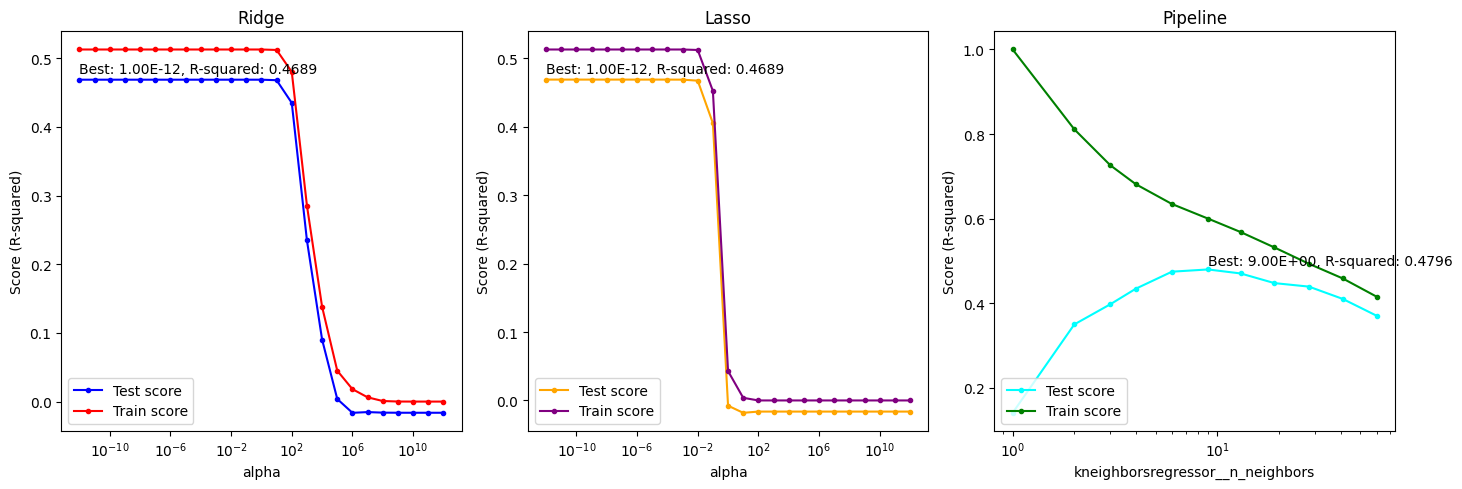

In [ ]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Define the hyperparameter search space
param_ridge = {'alpha': np.logspace(-12, 12, num=25)}
param_lasso = {'alpha': np.logspace(-12, 12, num=25)}
param_knn = {'kneighborsregressor__n_neighbors': np.geomspace(1, 60, num=12, dtype=int)[1:]}
param_elastic = {'alpha': np.logspace(-12, 12, num=25), 'l1_ratio': np.linspace(0, 1, num=11)}

# Define the models
models = [Ridge(), Lasso(), make_pipeline(StandardScaler(), KNeighborsRegressor()), ElasticNet()]

# Define a function to plot the results of the grid search
def plot_tuning(grid_search, param_name, ax, color_train='blue', color_test='green'):
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker='.', label='Test score', color=color_test)
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_train_score'], marker='.', label='Train score', color=color_train)
    ax.set_ylabel('Score (R-squared)')
    ax.set_xlabel(param_name)
    ax.legend(loc='lower left')
    ax.set_xscale('log')
    ax.set_title(grid_search.best_estimator_.__class__.__name__)
    best_param, best_score = grid_search.best_params_[param_name], grid_search.best_score_
    ax.text(best_param, best_score + 0.01, f"Best: {best_param:.2E}, R-squared: {best_score:.4f}")

# Run the grid search for each model and hyperparameter space
grid_searches = [GridSearchCV(model, param_grid, n_jobs=-1, cv=3, return_train_score=True).fit(X, y)
                 for model, param_grid in zip(models, [param_ridge, param_lasso, param_knn, param_elastic])]

# Create subplots for each grid search
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot the results for Ridge, Lasso, and kNN with different line colors
plot_tuning(grid_searches[0], 'alpha', axes[0], color_train='red', color_test='blue')
plot_tuning(grid_searches[1], 'alpha', axes[1], color_train='purple', color_test='orange')
plot_tuning(grid_searches[2], 'kneighborsregressor__n_neighbors', axes[2], color_train='green', color_test='cyan')

plt.tight_layout()
plt.show()


### Exercise 2.2
Interpret the plots. When are the methods underfitting? When are they overfitting? How sensitive are they to the regularization hyperparameter?

#### Solution

Ridge and Lasso behave very similarly, producing the same optimal result for small alpha's (small amounts of regularization), and then quickly dropping down to default performance (0 $R^2$) around alpha=0.1. Any more regularization makes the model completely underfit the data. The only difference is that Ridge has a slightly more gradual descent than Lasso. kNN yields a worse score (0.4175 $R^2$) even after tuning. It has a clear optimum around 9 nearest neighbors, after which it gradually starts underfitting.

### Exercise 2.3
ElasticNet allows to mix L1 and L2 loss, and the `l1_ratio` hyperparameter defines the ratio of L1 loss. Hence, it has two interacting hyperparameters: l1_ratio and alpha. Run a grid search to obtain a matrix of l1_ratio and alpha values and the resulting cross-validation scores. Then, use the function provided below to plot a heatmap of all values and interpret the result. Can you explain how the two hyperparameters interact?

In [ ]:
# Generic heatmap
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f", printvalues=False):
    """
    Plots a heatmap for the performance of a model for every combination of two hyperparameter values

    values: nxn array with all evaluation results, varying the first hyperparameter first
    xlabel: name of the first hyperparameter
    ylabel: name of the second hyperparameter
    xticklabels: values of the first hyperparameter
    yticklabels: values of the second hyperparameter
    cmap: colormap
    vmin: minimal score
    vmax: maximal score
    ax: plot axes
    fmt: format for printing the scores
    printvalues: whether to print the scores
    """
    if ax is None:
        ax = plt.gca()
    img = ax.pcolor(values, cmap=cmap, vmin=None, vmax=None)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=12, labelrotation=90)

    if(printvalues):
        for p, color, value in zip(img.get_paths(), img.get_facecolors(), img.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.mean(color[:3]) > 0.5:
                c = 'k'
            else:
                c = 'w'
            ax.text(x, y, fmt % value, color=c, ha="center", va="center", size=10)
    return img

#### Solution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Define the range of hyperparameters
alpha_range = np.logspace(-12, 12, num=25)
l1_ratio_range = np.linspace(0, 1, num=11)

# Create ElasticNet model
elastic_net = ElasticNet()

# Create parameter grid for GridSearchCV
param_grid = {'alpha': alpha_range, 'l1_ratio': l1_ratio_range}

# Run the grid search
grid_search = GridSearchCV(elastic_net, param_grid, cv=3, return_train_score=True)

# Fit the model to the data (replace X and y with your data)
grid_search.fit(X, y)

# Extract cross-validation results and reshape into a matrix
scores_matrix = np.array(grid_search.cv_results_['mean_test_score']).reshape(len(alpha_range), len(l1_ratio_range))
scores_matrix = scores_matrix.T
# Define labels for the x and y axes
xlabel = 'Alpha'
ylabel = 'L1 Ratio'
xticklabels = [f"{alpha:.1E}" for alpha in alpha_range]
yticklabels = [f"{l1_ratio:.1f}" for l1_ratio in l1_ratio_range]

# Define a function to interpret the interaction between the two hyperparameters
def interpret_hyperparameters(scores_matrix, alpha_range, l1_ratio_range):
    max_score = np.max(scores_matrix)
    max_indices = np.where(scores_matrix == max_score)
    best_alpha = alpha_range[max_indices[0][0]]
    best_l1_ratio = l1_ratio_range[max_indices[1][0]]

    print(f"Best R-squared: {max_score:.4f}")
    print(f"Best Alpha: {best_alpha:.2E}")
    print(f"Best L1 Ratio: {best_l1_ratio:.2f}")

# Interpret the results
interpret_hyperparameters(scores_matrix, alpha_range, l1_ratio_range)



Best R-squared: 0.4689
Best Alpha: 1.00E-12
Best L1 Ratio: 0.00


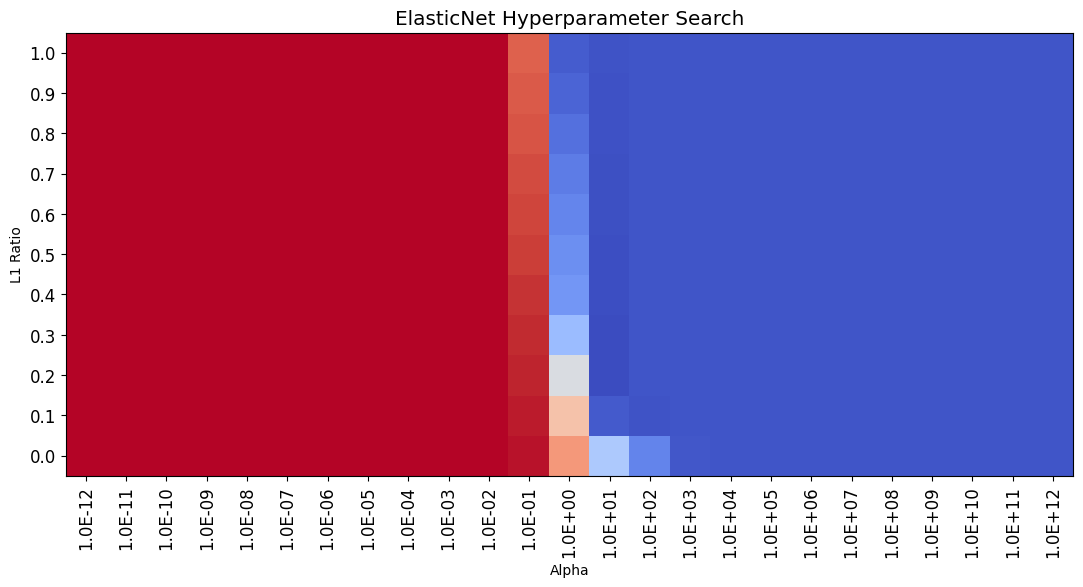

In [ ]:
# Create a heatmap using the provided 'heatmap' function
plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(1, 1, figsize=(13, 13))
heatmap(scores_matrix, xlabel='Alpha', xticklabels=xticklabels,
        ylabel='L1 Ratio', yticklabels=yticklabels, cmap="coolwarm", fmt="%.2f", ax=axes)
plt.title('ElasticNet Hyperparameter Search')
plt.show()

For ElasticNet we see the same sudden drop in performance around alpha=0.1. For l1_ratio=0, it is identical to Ridge (L2), showing a more gradual descent. For l1_ration=1, it is identical to Lasso (L1), showing the same sharp performance drop.

## Exercise 3: Visualizing coefficients
Finally, let's verify whether the different optimized linear models also find the same coefficients.

### Exercise 3.1
Draw a [scatterplot](https://matplotlib.org/gallery/shapes_and_collections/scatter.html) plotting the coefficients of the different models in different colors. Do you see much difference between the different models?

For all models, choose an alpha parameter that seems to work well in the previous exercise. When in doubt, use alpha=0.001.

#### Solution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def scatter_coefficients(X, y, alpha=0.001):
    # Create a list of linear models with different regularizations
    models = [
        LinearRegression(),
        Ridge(alpha=alpha),
        Lasso(alpha=alpha),
        ElasticNet(alpha=alpha)
    ]

    # Standardize the features
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)

    # Fit each model to the data and obtain their coefficients
    coeff = [m.fit(X_std, y).coef_ for m in models]

    # Get the attribute names (assuming X is a DataFrame)
    attribute_names = list(X.columns)

    # Define colors for the scatterplot
    colors = ['k', 'b', 'r', 'y']

    # Create a scatterplot
    plt.figure(figsize=(10, 6))
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

    # Scatterplot each model's coefficients with different colors and labels
    for i, model in enumerate(models):
        plt.scatter(attribute_names, coeff[i], s=(4 - i) * 40, c=colors[i], label=model.__class__.__name__)

    # Add a legend to the plot
    plt.legend()

    # Set plot title and labels
    plt.title('Comparison of Coefficients for Linear Models')
    plt.xlabel('Attribute Names')
    plt.ylabel('Coefficient Value')

    # Show the plot
    plt.show()

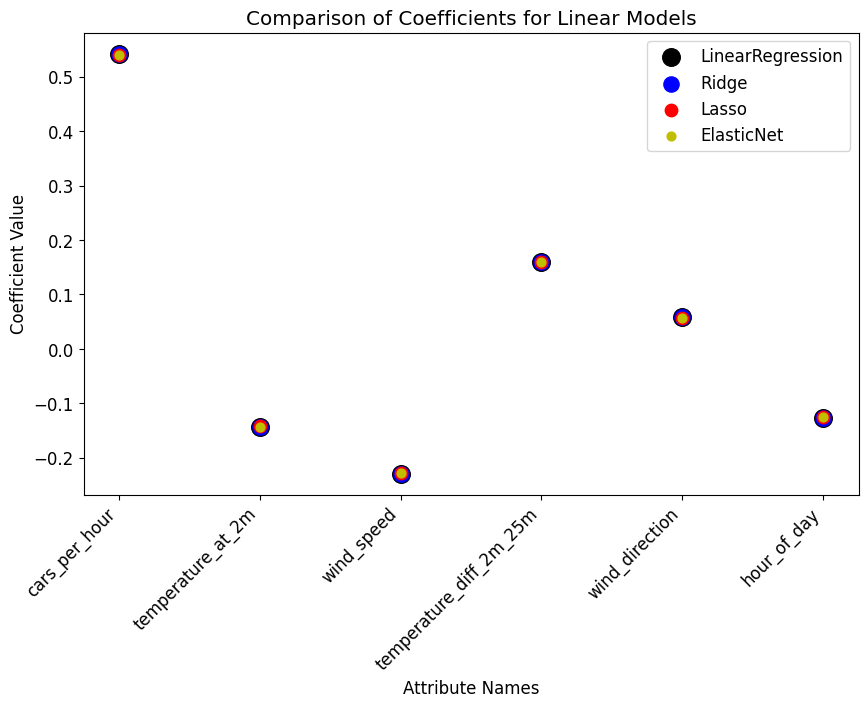

In [ ]:
# Example usage:
scatter_coefficients(X, y, alpha=0.001)  # Replace X and y

The different techniques find almost _exactly_ the same coefficients (the markers overlap). cars_per_hour is the most influential, followed by temperature_diff_2m_25m and wind_speed. The others are nearly zero.

### Exercise 3.2
Redraw the same plot but now using a large amount of regularization (e.g. alpha=1). What do you observe? Does this help you explain the performance difference between Ridge and Lasso in exercise 1.2?

#### Solution
Increasing alpha makes Lasso completely ignore most features: the coefficients are exactly 0. Hence, it is important to tune alpha carefully.

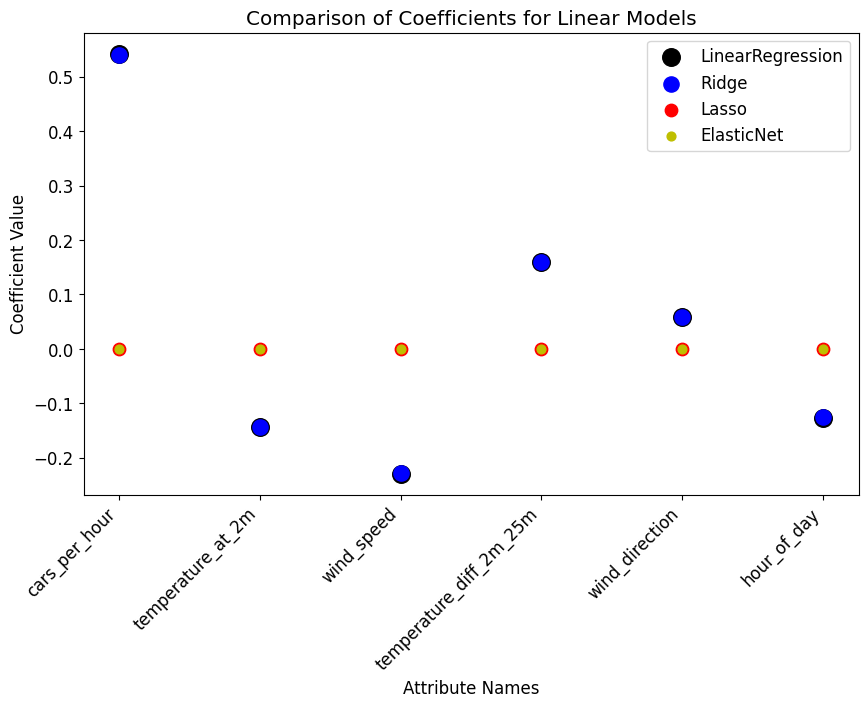

In [ ]:
scatter_coefficients(X, y, alpha=1)  # Replace X and y